## Задание №1

In [16]:
from sympy import symbols, Matrix

In [7]:
rho, mu, llambda=symbols("rho, mu, lambda",real=True)

In [11]:
import numpy
from sympy import Matrix, zeros

In [52]:
A = Matrix([[0, 0, 0, -1/rho, 0, 0, 0, 0, 0],
            [0, 0, 0,0, -1/rho, 0, 0, 0, 0],
            [0, 0, 0,0,0, -1/rho, 0, 0, 0], 
            [-(llambda+2*mu), 0, 0, 0, 0, 0, 0, 0, 0], 
            [0, -mu, 0, 0, 0, 0, 0, 0,0],
            [0,0, -mu, 0, 0, 0, 0, 0,0],
           [-llambda, 0, 0, 0, 0, 0, 0,0,0 ],
           [0, 0, 0, 0, 0, 0, 0,0,0 ],
           [-llambda, 0, 0, 0, 0, 0, 0,0,0 ]])
A

Matrix([
[             0,   0,   0, -1/rho,      0,      0, 0, 0, 0],
[             0,   0,   0,      0, -1/rho,      0, 0, 0, 0],
[             0,   0,   0,      0,      0, -1/rho, 0, 0, 0],
[-lambda - 2*mu,   0,   0,      0,      0,      0, 0, 0, 0],
[             0, -mu,   0,      0,      0,      0, 0, 0, 0],
[             0,   0, -mu,      0,      0,      0, 0, 0, 0],
[       -lambda,   0,   0,      0,      0,      0, 0, 0, 0],
[             0,   0,   0,      0,      0,      0, 0, 0, 0],
[       -lambda,   0,   0,      0,      0,      0, 0, 0, 0]])

In [79]:
for i in  A.eigenvals():
    print ('Собств.значение:', i,'---кратность:' , A.eigenvals()[i])

Собств.значение: -sqrt(lambda/rho + 2*mu/rho) ---кратность: 1
Собств.значение: sqrt(lambda/rho + 2*mu/rho) ---кратность: 1
Собств.значение: -sqrt(mu/rho) ---кратность: 2
Собств.значение: sqrt(mu/rho) ---кратность: 2
Собств.значение: 0 ---кратность: 3


## Задание №2

In [176]:
from scipy import linalg, integrate

In [147]:
import matplotlib.pyplot as plt

Solve: [ 2. -2.  9.]


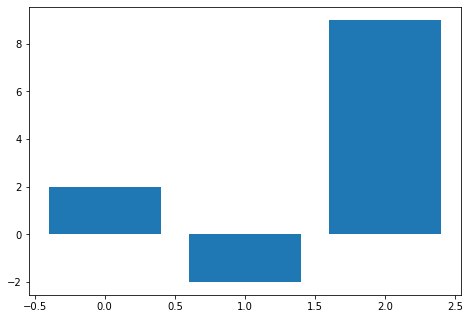

In [220]:
matr('1.txt')

Solve: [ 374.99999993  523.99999998  671.00000003  816.00000005  958.99999996
 1100.00000001 1239.00000001 1375.99999996 1511.00000003 1644.00000003
 1774.99999999 1904.00000001 2030.99999997 2156.00000005 2279.00000004
 2400.00000008 2518.99999999 2636.00000005 2750.99999994 2863.99999991
 2975.00000002 3083.99999999 3190.99999998 3296.00000008 3398.99999993
 3499.99999993 3598.99999998 3696.         3790.99999991 3884.00000003
 3974.99999997 4064.         4151.00000008 4236.00000005 4319.00000001
 4399.99999996 4479.         4555.99999993 4630.99999996 4703.99999995
 4775.00000003 4844.         4910.99999998 4975.99999994 5039.00000009
 5100.00000002 5159.00000004 5216.         5271.00000001 5323.99999994
 5374.99999999 5424.00000005 5471.         5515.99999991 5558.99999999
 5600.00000004 5639.00000004 5676.00000001 5711.00000001 5744.00000003
 5775.00000011 5803.99999996 5830.99999999 5856.00000001 5878.99999995
 5900.00000002 5918.99999999 5936.00000002 5951.00000004 5964.00000004

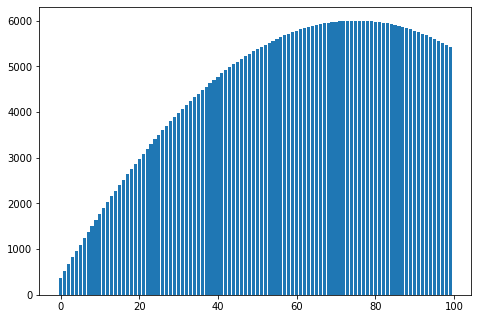

In [221]:
matr('2.txt')

In [222]:
def matr(path):
    f = open(path, 'r')
    n = int(f.readline())
    l = [line.strip() for line in f]
    ls = []
    for i in l:
        x = [float(j) for j in i.split()]
        ls.append(x)
    X = ls[0:n]
    b = ls[-1]
    a = linalg.solve(X, b)
    print('Solve:', a)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = [x for x in range(n)]
    students = a
    ax.bar(langs,students)
    plt.show()
    f.close()
    
        

## Задание №3

In [184]:
y = Function('y')
x = symbols('x')
y0 = sqrt(2)
equation = Eq(diff(y(x), x), -2*y(x))
equation

Eq(Derivative(y(x), x), -2*y(x))

In [185]:
solution = dsolve(eq = equation, ics={y(0): y0})
solution

Eq(y(x), sqrt(2)*exp(-2*x))

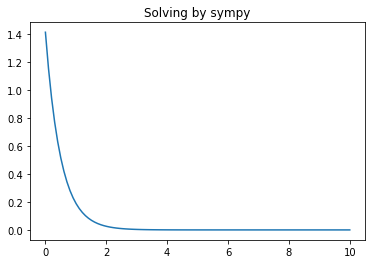

In [194]:
x1 = numpy.linspace(0, 10, 100)
y1 = [solution.subs({x: x2}).rhs for x2 in x1]
plt.title('Solving by sympy')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1, y1)

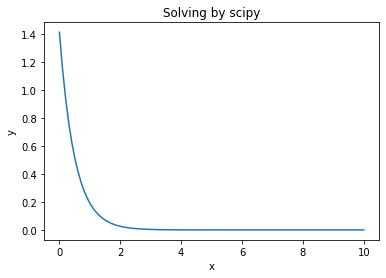

In [218]:
def solve(y, t):
    return -2 * y
y2 = integrate.odeint(solve, y0, xarray)
plt.title('Solving by scipy')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1, y2)

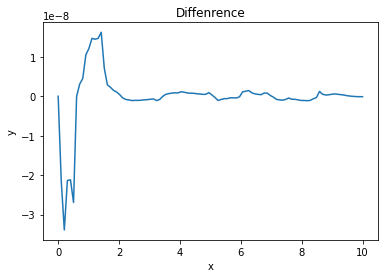

In [224]:
y3 = []
for i in range(len(y1)):
    y3.append(float(y1[i])-y2[i])
plt.title('Diffenrence')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1, y3)